In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import torch

from pybnn import DNGO
from pybnn.util.normalization import zero_mean_unit_var_normalization, zero_mean_unit_var_denormalization

import bayes_optimize
from bayes_optimize import BayesOptimize 

import toy_problem
from toy_problem import get_hyp, prepare_D_surrogate

import util.plotting as util_plot
from util.plotting import setup, visualize_dataset

rng = np.random.RandomState(42)

In [2]:
D_surrogate = prepare_D_surrogate(8)

Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x


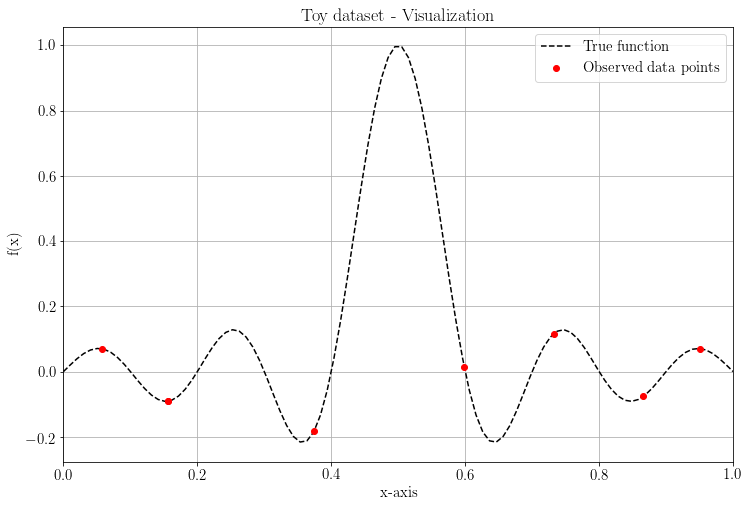

In [3]:
setup(size=(10, 8))
visualize_dataset(D_surrogate[0], D_surrogate[1])

### Setting up values for Bayesian Optimization

In [4]:
# Test Space
num_hyp = 1
a_val = np.linspace(0, 1, 200)
zeta_test = np.array([[a_val[i]] for i in range(len(a_val)) ])
zeta_test = zeta_test.reshape((len(a_val), num_hyp))

# DNGO Model
dngo_model = DNGO(do_mcmc=False)

### BO in Action

In [5]:
bo = BayesOptimize(D_task=None, D_surrogate=(D_surrogate[0][:, None], np.array(D_surrogate[1])), 
                   task_oracle_file=toy_problem, dngo_model=dngo_model, num_epochs=5, zeta_test=zeta_test)

In [6]:
bo.optimal_hyperparameters(save_plots=True)

  0%|          | 0/5 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: 8.333913
         Iterations: 59
         Function evaluations: 153


 20%|██        | 1/5 [00:00<00:03,  1.02it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 10.547175
         Iterations: 57
         Function evaluations: 147


 40%|████      | 2/5 [00:02<00:03,  1.00s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


 60%|██████    | 3/5 [00:03<00:02,  1.00s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 12.674164
         Iterations: 64
         Function evaluations: 154


 80%|████████  | 4/5 [00:03<00:00,  1.02it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 14.724863
         Iterations: 137
         Function evaluations: 266


100%|██████████| 5/5 [00:04<00:00,  1.02it/s]

Hyperparameters to be optimized:  x


array([0.41708543])

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

import torch

from pybnn import DNGO
from pybnn.util.normalization import zero_mean_unit_var_normalization, zero_mean_unit_var_denormalization

%matplotlib inline

plt.rc('text', usetex=True)
plt.rc('font', size=15.0, family='serif')
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]

In [2]:
rng = np.random.RandomState(42)

In [3]:
from toy_problem import Task_Toy

In [6]:
def prepare_D_surrogate(num_points):
    x_arr = rng.rand(num_points)
    y = []
    for x in x_arr:
        hyperparams = {}
        hyperparams['x'] = {'value': x, 'description': 'None', 'type': 'continuous', 'range':[-4, 4]}
        hyperparams['metainfo'] = ['x']
        task = Task_Toy(hyperparams)
        y.append(task.metric())
    return x_arr, y

In [7]:
D_surrogate = prepare_D_surrogate()

Hyperparameters to be optimized:  x
Hyperparameters to be optimized:  x


In [8]:
D_surrogate

(array([0.73199394, 0.59865848]), [0.11583296421662263, 0.013593546629467384])

In [11]:
setup(size=(10, 8))

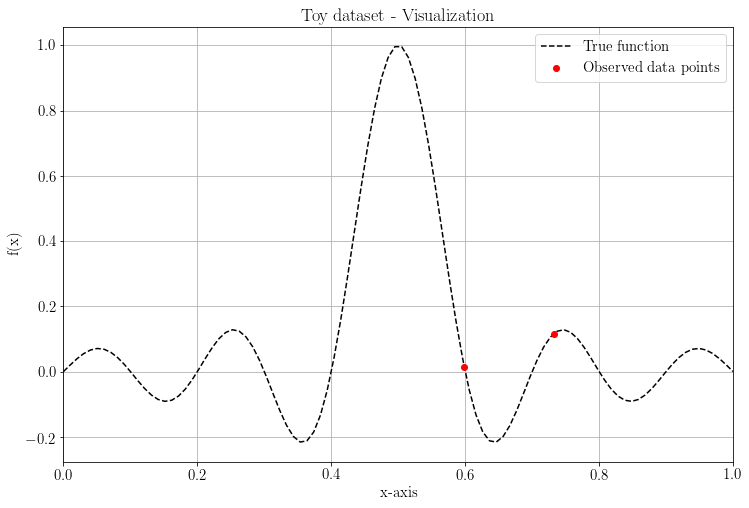

In [12]:
visualize_dataset(D_surrogate[0], D_surrogate[1])

In [60]:
num_hyp = 1
a_val = np.linspace(0, 1, 200)
zeta_test = np.array([[a_val[i]] for i in range(len(a_val)) ])
zeta_test = zeta_test.reshape((len(a_val), num_hyp))

In [72]:
import toy_problem

In [73]:
from importlib import reload
reload(toy_problem)

<module 'toy_problem' from '/home/piyush/Desktop/acads/8th_Semester/CS698X/BayesOpt/code/toy_problem.py'>

In [74]:
from toy_problem import get_hyp

In [75]:
dngo_model = DNGO(do_mcmc=False)

In [185]:
task_oracle = Task_Toy

In [190]:

reload(pt)

<module 'util.plotting' from '/home/piyush/Desktop/acads/8th_Semester/CS698X/BayesOpt/code/util/plotting.py'>

In [191]:
import bayes_optimize
reload(bayes_optimize)

from bayes_optimize import BayesOptimize 

In [194]:
bo = BayesOptimize(D_task=None, D_surrogate=(D_surrogate[0][:, None], np.array(D_surrogate[1])), 
                   task_oracle_file=toy_problem, dngo_model=dngo_model, num_epochs=100, zeta_test=zeta_test)

In [195]:
bo.optimal_hyperparameters(save_plots=True)

  0%|          | 0/100 [00:00<?, ?it/s]

Optimization terminated successfully.
         Current function value: 3.347069
         Iterations: 57
         Function evaluations: 134


  1%|          | 1/100 [00:00<01:30,  1.10it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 4.230453
         Iterations: 56
         Function evaluations: 147


  2%|▏         | 2/100 [00:02<01:34,  1.03it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 5.576765
         Iterations: 67
         Function evaluations: 135


  3%|▎         | 3/100 [00:02<01:31,  1.06it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 7.142960
         Iterations: 62
         Function evaluations: 153


  4%|▍         | 4/100 [00:03<01:32,  1.04it/s]

Hyperparameters to be optimized:  x


  5%|▌         | 5/100 [00:04<01:34,  1.00it/s]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 6.501649
         Iterations: 47
         Function evaluations: 123


  6%|▌         | 6/100 [00:06<01:34,  1.01s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 1.930131
         Iterations: 62
         Function evaluations: 149


  7%|▋         | 7/100 [00:07<01:34,  1.01s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: 2.122943
         Iterations: 55
         Function evaluations: 136


  8%|▊         | 8/100 [00:08<01:34,  1.03s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -2.011056
         Iterations: 57
         Function evaluations: 136


  9%|▉         | 9/100 [00:09<01:34,  1.04s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -2.838542
         Iterations: 53
         Function evaluations: 126


 10%|█         | 10/100 [00:10<01:42,  1.13s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -6.722295
         Iterations: 55
         Function evaluations: 143


 11%|█         | 11/100 [00:11<01:44,  1.18s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -7.856679
         Iterations: 54
         Function evaluations: 135


 12%|█▏        | 12/100 [00:12<01:38,  1.11s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -9.370945
         Iterations: 50
         Function evaluations: 126


 13%|█▎        | 13/100 [00:13<01:39,  1.14s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


 14%|█▍        | 14/100 [00:15<01:45,  1.23s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -8.953201
         Iterations: 60
         Function evaluations: 139


 15%|█▌        | 15/100 [00:16<01:51,  1.32s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -11.294126
         Iterations: 49
         Function evaluations: 121


 16%|█▌        | 16/100 [00:18<02:01,  1.45s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -11.957925
         Iterations: 46
         Function evaluations: 119


 17%|█▋        | 17/100 [00:20<02:15,  1.63s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -21.105513
         Iterations: 50
         Function evaluations: 127


 18%|█▊        | 18/100 [00:22<02:17,  1.68s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -14.821606
         Iterations: 54
         Function evaluations: 131


 19%|█▉        | 19/100 [00:25<02:40,  1.98s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -17.124310
         Iterations: 52
         Function evaluations: 133


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 20%|██        | 20/100 [00:28<03:08,  2.35s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -19.827424
         Iterations: 59
         Function evaluations: 141


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 21%|██        | 21/100 [00:31<03:17,  2.50s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -20.919137
         Iterations: 62
         Function evaluations: 137


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 22%|██▏       | 22/100 [00:33<03:05,  2.38s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -21.044222
         Iterations: 66
         Function evaluations: 152


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 23%|██▎       | 23/100 [00:35<02:59,  2.33s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 24%|██▍       | 24/100 [00:37<02:56,  2.32s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -29.802656
         Iterations: 46
         Function evaluations: 117


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 25%|██▌       | 25/100 [00:39<02:48,  2.24s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -28.220472
         Iterations: 50
         Function evaluations: 131


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 26%|██▌       | 26/100 [00:42<02:47,  2.27s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -34.037102
         Iterations: 58
         Function evaluations: 142


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 27%|██▋       | 27/100 [00:44<02:37,  2.16s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -45.018052
         Iterations: 59
         Function evaluations: 145


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 28%|██▊       | 28/100 [00:46<02:35,  2.15s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -42.016328
         Iterations: 54
         Function evaluations: 142


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 29%|██▉       | 29/100 [00:48<02:37,  2.22s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 30%|███       | 30/100 [00:51<02:39,  2.28s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -48.863762
         Iterations: 51
         Function evaluations: 129


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 31%|███       | 31/100 [00:53<02:35,  2.25s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -44.739587
         Iterations: 57
         Function evaluations: 142


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 32%|███▏      | 32/100 [00:55<02:33,  2.25s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -55.204138
         Iterations: 47
         Function evaluations: 124


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 33%|███▎      | 33/100 [00:57<02:31,  2.25s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -43.066283
         Iterations: 57
         Function evaluations: 131


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 34%|███▍      | 34/100 [01:00<02:28,  2.26s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -64.281133
         Iterations: 51
         Function evaluations: 140


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 35%|███▌      | 35/100 [01:02<02:31,  2.33s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -63.392079
         Iterations: 67
         Function evaluations: 168


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 36%|███▌      | 36/100 [01:05<02:38,  2.48s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -65.311816
         Iterations: 40
         Function evaluations: 107


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 37%|███▋      | 37/100 [01:07<02:36,  2.49s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -63.001185
         Iterations: 51
         Function evaluations: 129


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 38%|███▊      | 38/100 [01:10<02:39,  2.58s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 39%|███▉      | 39/100 [01:14<02:53,  2.85s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -73.216076
         Iterations: 67
         Function evaluations: 168


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 40%|████      | 40/100 [01:17<02:52,  2.87s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 41%|████      | 41/100 [01:20<02:50,  2.90s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -74.825145
         Iterations: 54
         Function evaluations: 137


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 42%|████▏     | 42/100 [01:23<03:02,  3.15s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -76.371707
         Iterations: 53
         Function evaluations: 133


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 43%|████▎     | 43/100 [01:26<02:57,  3.11s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 44%|████▍     | 44/100 [01:30<02:57,  3.17s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -91.191071
         Iterations: 47
         Function evaluations: 123


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 45%|████▌     | 45/100 [01:33<02:52,  3.13s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 46%|████▌     | 46/100 [01:36<02:46,  3.08s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -88.584547
         Iterations: 46
         Function evaluations: 112


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 47%|████▋     | 47/100 [01:38<02:38,  2.99s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -86.315850
         Iterations: 52
         Function evaluations: 135


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 48%|████▊     | 48/100 [01:42<02:38,  3.06s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -88.674285
         Iterations: 47
         Function evaluations: 119


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 49%|████▉     | 49/100 [01:45<02:38,  3.10s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 50%|█████     | 50/100 [01:48<02:39,  3.18s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -7.866422
         Iterations: 60
         Function evaluations: 122


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 51%|█████     | 51/100 [01:52<02:38,  3.24s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 52%|█████▏    | 52/100 [01:55<02:44,  3.43s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -91.008935
         Iterations: 58
         Function evaluations: 138


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 53%|█████▎    | 53/100 [01:59<02:44,  3.49s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -100.501290
         Iterations: 62
         Function evaluations: 142


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 54%|█████▍    | 54/100 [02:02<02:37,  3.43s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -101.043288
         Iterations: 46
         Function evaluations: 118


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 55%|█████▌    | 55/100 [02:06<02:32,  3.40s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -15.612974
         Iterations: 57
         Function evaluations: 115


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 56%|█████▌    | 56/100 [02:09<02:27,  3.35s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -17.327762
         Iterations: 47
         Function evaluations: 96


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 57%|█████▋    | 57/100 [02:13<02:29,  3.47s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -18.050804
         Iterations: 66
         Function evaluations: 135


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 58%|█████▊    | 58/100 [02:17<02:31,  3.60s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 59%|█████▉    | 59/100 [02:20<02:31,  3.69s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -113.438862
         Iterations: 56
         Function evaluations: 137


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 60%|██████    | 60/100 [02:25<02:33,  3.83s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 61%|██████    | 61/100 [02:29<02:37,  4.03s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -118.895527
         Iterations: 52
         Function evaluations: 135


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 62%|██████▏   | 62/100 [02:33<02:36,  4.11s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -130.700506
         Iterations: 61
         Function evaluations: 146


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 63%|██████▎   | 63/100 [02:38<02:33,  4.14s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -19.872708
         Iterations: 71
         Function evaluations: 141


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 64%|██████▍   | 64/100 [02:41<02:24,  4.01s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 65%|██████▌   | 65/100 [02:45<02:21,  4.03s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -23.270634
         Iterations: 66
         Function evaluations: 134


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 66%|██████▌   | 66/100 [02:49<02:14,  3.96s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -91.182074
         Iterations: 51
         Function evaluations: 132


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 67%|██████▋   | 67/100 [02:53<02:13,  4.03s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -25.561348
         Iterations: 161
         Function evaluations: 331


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 68%|██████▊   | 68/100 [02:57<02:08,  4.00s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -27.588295
         Iterations: 68
         Function evaluations: 140


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 69%|██████▉   | 69/100 [03:02<02:08,  4.14s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -27.634032
         Iterations: 54
         Function evaluations: 108


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 70%|███████   | 70/100 [03:07<02:10,  4.36s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 71%|███████   | 71/100 [03:12<02:14,  4.64s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -25.189596
         Iterations: 54
         Function evaluations: 108


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 72%|███████▏  | 72/100 [03:17<02:09,  4.61s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -30.836085
         Iterations: 71
         Function evaluations: 166


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 73%|███████▎  | 73/100 [03:21<02:02,  4.53s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -31.852817
         Iterations: 68
         Function evaluations: 135


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 74%|███████▍  | 74/100 [03:26<02:01,  4.66s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -33.819453
         Iterations: 70
         Function evaluations: 153


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 75%|███████▌  | 75/100 [03:30<01:55,  4.62s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -34.821572
         Iterations: 64
         Function evaluations: 127


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 76%|███████▌  | 76/100 [03:35<01:53,  4.75s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -31.250189
         Iterations: 76
         Function evaluations: 170


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 77%|███████▋  | 77/100 [03:40<01:46,  4.65s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -33.054582
         Iterations: 48
         Function evaluations: 105


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 78%|███████▊  | 78/100 [03:44<01:39,  4.54s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 79%|███████▉  | 79/100 [03:50<01:46,  5.06s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -35.322805
         Iterations: 69
         Function evaluations: 145


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 80%|████████  | 80/100 [03:55<01:41,  5.05s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -34.839770
         Iterations: 67
         Function evaluations: 142


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 81%|████████  | 81/100 [04:00<01:35,  5.04s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -38.518858
         Iterations: 57
         Function evaluations: 129


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 82%|████████▏ | 82/100 [04:07<01:37,  5.44s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -35.311849
         Iterations: 82
         Function evaluations: 174


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 83%|████████▎ | 83/100 [04:12<01:31,  5.40s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -38.169886
         Iterations: 74
         Function evaluations: 157


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 84%|████████▍ | 84/100 [04:18<01:27,  5.48s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -36.328451
         Iterations: 64
         Function evaluations: 144


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 85%|████████▌ | 85/100 [04:23<01:21,  5.40s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/pybnn-0.0.5-py3.6.egg/pybnn/dngo.py:301: RuntimeWarning: invalid value encountered in log
/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: -100.458441
         Iterations: 47
         Function evaluations: 122


 86%|████████▌ | 86/100 [04:28<01:12,  5.21s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -41.413535
         Iterations: 60
         Function evaluations: 124


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 87%|████████▋ | 87/100 [04:33<01:06,  5.10s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 88%|████████▊ | 88/100 [04:38<01:01,  5.14s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -167.106978
         Iterations: 50
         Function evaluations: 129


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 89%|████████▉ | 89/100 [04:44<01:01,  5.55s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -42.316228
         Iterations: 58
         Function evaluations: 122


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 90%|█████████ | 90/100 [04:49<00:53,  5.39s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/pybnn-0.0.5-py3.6.egg/pybnn/dngo.py:301: RuntimeWarning: invalid value encountered in log
/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: -165.354141
         Iterations: 59
         Function evaluations: 144


 91%|█████████ | 91/100 [04:54<00:47,  5.27s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -44.758475
         Iterations: 59
         Function evaluations: 137


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 92%|█████████▏| 92/100 [05:00<00:42,  5.35s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -46.710543
         Iterations: 65
         Function evaluations: 149


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 93%|█████████▎| 93/100 [05:05<00:37,  5.33s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/scipy/optimize/optimize.py:570: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 94%|█████████▍| 94/100 [05:10<00:31,  5.32s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -53.008840
         Iterations: 121
         Function evaluations: 257


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 95%|█████████▌| 95/100 [05:16<00:26,  5.30s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -53.104787
         Iterations: 85
         Function evaluations: 181


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 96%|█████████▌| 96/100 [05:21<00:21,  5.25s/it]

Hyperparameters to be optimized:  x


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/pybnn-0.0.5-py3.6.egg/pybnn/dngo.py:301: RuntimeWarning: invalid value encountered in log
/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Optimization terminated successfully.
         Current function value: -63.904455
         Iterations: 58
         Function evaluations: 139


 97%|█████████▋| 97/100 [05:28<00:17,  5.71s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -106.093294
         Iterations: 63
         Function evaluations: 157


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 98%|█████████▊| 98/100 [05:34<00:12,  6.04s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -74.679746
         Iterations: 47
         Function evaluations: 105


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
 99%|█████████▉| 99/100 [05:40<00:05,  5.90s/it]

Hyperparameters to be optimized:  x
Optimization terminated successfully.
         Current function value: -11.621292
         Iterations: 58
         Function evaluations: 135


/home/piyush/miniconda3/envs/vision/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
100%|██████████| 100/100 [05:46<00:00,  5.99s/it]

Hyperparameters to be optimized:  x


array([0.45226131])

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>